In [1]:
## processing
import random
import numpy as np

## visualization
import matplotlib.pyplot as plt

## Defining microtubule length using negative binomial distribution

In [12]:
lMT = np.random.negative_binomial(1, 0.4, size=100) + 1

In [13]:
d_lMT = {}
for i in range(1, max(lMT)+1):
    d_lMT[i] = np.count_nonzero(lMT == i)

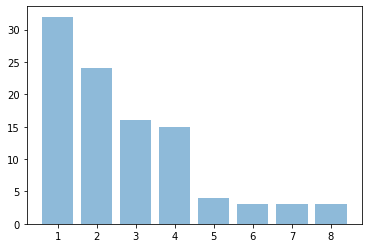

In [14]:
fig, ax = plt.subplots()
ax.bar(d_lMT.keys(), d_lMT.values(), align='center', alpha=0.5)
plt.show()

In [2]:
file = open('template.cym', 'r')
lines = file.readlines()

In [ ]:
with open('config.cym', 'w') as f:
    for line in lines[:28]:
        f.write(line)
    for length,count in d_lMT.items():
        f.write('new {} microtubule'.format(count))
        f.write("\n{\n")
        f.write("\tlength = {}".format(length))
        f.write("\n}\n\n")
    for line in lines[33:]:
        f.write(line)

## Orientation sorting

In [2]:
positions = []
gap = 3
for i in range(0, 16, gap):
    positions.append('{} 0 0'.format(i))
    positions.append('0 {} 0'.format(i))
    positions.append('{} {} 0'.format(i, i))

In [7]:
num_MT = int(1000 / len(positions))
num_MT

55

In [10]:
orientations = []
for i in range(1, 11):
    for j in range(1, 11):
        orientations.append('{} {} 0'.format(i, j))

In [22]:
with open('config0002.cym', 'w') as f:
    for line in lines[:28]:
        f.write(line)
    for i in range(3):
        for position in positions:
            orientation = random.choice(orientations)
            f.write('new {} microtubule\n'.format(num_MT))
            f.write("{\n")
            f.write("\tlength = 1\n")
            f.write("\tposition = {}\n".format(position))
            f.write("\torientation = {}\n".format(orientation))
            f.write("\n}\n\n")
    for line in lines[33:]:
        f.write(line)